# A translation of the ISCC-NBS Color Naming System into CIELAB Lch

The [ISCC–NBS System of Color Designation](https://en.wikipedia.org/wiki/ISCC%E2%80%93NBS_system) is a system for naming colors based on a set of 12 basic color terms and a small set of adjective modifiers. This system formally defines a set of non-technical color names as a subset of the [Munsell System](https://en.wikipedia.org/wiki/Munsell_color_system), which was an early attempt at measuring color in terms of a hue, value, and chroma.

Unfortunately, converting Munsell to a more present-day conventional system (such as RGB or Lab) [involves interpolation of empirical data in 3D that is highly non-linear](https://stackoverflow.com/a/12556404) and libraries for handling Munsell seem to be few and far between. Which is unfortunate, since the ISCC-NBS naming system seems like a useful categorization scheme.

The Python [Colour Science](https://www.colour-science.org/) library does provide such conversion functionality, and we can use that to renotate and re-bound the color ranges from the ISCC-NBS system.

In [2]:
# But first, we need some things...
import sys
!{sys.executable} -m pip install -q matplotlib colour-science ipympl shapely scipy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Pull in data for the ISCC-NBS system
from ISCC_NBS_renotations import ColorDatabase
import os

colordb = ColorDatabase(os.path.join(os.getcwd(), "..", "iscc-nbs.xml"))

print(colordb.get_descriptor_from_munsell('6P 4.5/11.0').name)

Strong purple


The Munsell color volume can be thought of as a cylinder (or at least cylinder-like). Most of the charts in _The Universal Color Language_ are given as x-y range plots, looking at slices of that cylinder, but we can also present the information in polar form.

c:\code\venv\lib\site-packages\colour\utilities\verbose.py:266: ColourUsageWarning: "RGB" array contains values over 1 and will be normalised, unpredictable results may occur!
  warn(*args, **kwargs)


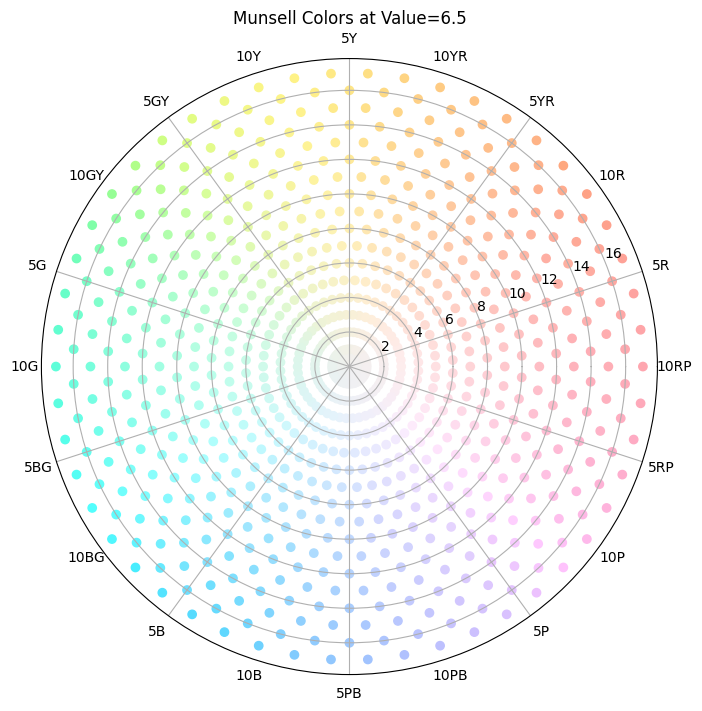

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import colour
import itertools

from ISCC_NBS_renotations import munsell_to_polar
from ISCC_NBS_renotations import munsell_to_rgbstr
from ISCC_NBS_renotations import set_xticks_munsell_hues

from munsell import munsell_specification_to_munsell_colour

hues = np.arange(1, 10, 2.0)
hues_offset = np.arange(2, 11, 2.0)
hue_codes = range(1, 11)
chromas = [0.25, 0.50, 1.0] + [x for x in np.arange(2, 18, 2.0)]
chromas_offset = np.arange(3, 18, 2.0)
value = 9.5
colors_to_plot = (
    [munsell_specification_to_munsell_colour([*x]) for x in itertools.product(hues, [value], chromas, hue_codes)] +
    [munsell_specification_to_munsell_colour([*x]) for x in itertools.product(hues_offset, [value], chromas_offset, hue_codes)]
)

theta, r = zip(*[munsell_to_polar(x) for x in colors_to_plot])
colors = [munsell_to_rgbstr(x) for x in colors_to_plot]

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
set_xticks_munsell_hues(ax)
ax.set_title("Munsell Colors at Value=6.5")
c = ax.scatter(theta, r, c=colors)

We can also group these by what 

c:\code\venv\lib\site-packages\colour\utilities\verbose.py:266: ColourUsageWarning: "RGB" array contains negative values, those will be clipped, unpredictable results may occur!
  warn(*args, **kwargs)


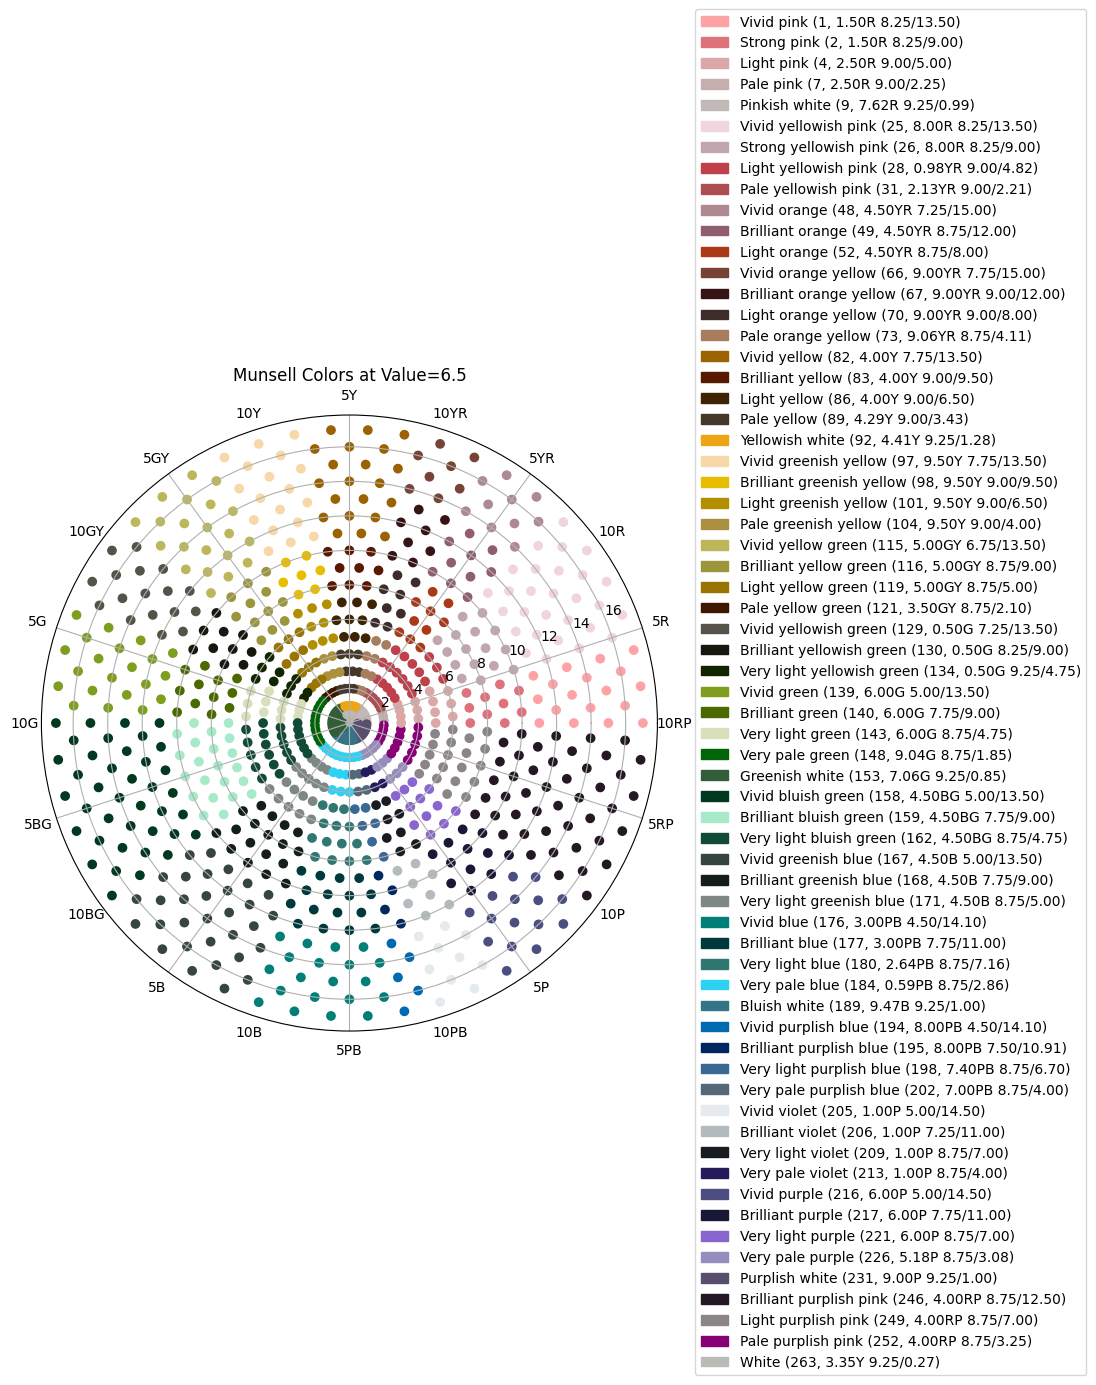

In [5]:
theta, r = zip(*[munsell_to_polar(x) for x in colors_to_plot])

descriptors = [colordb.get_descriptor_from_munsell(x) for x in colors_to_plot]
ids = [x.id for x in descriptors]
unique_ids = list(set(ids))
unique_ids.sort()
color_map = [munsell_to_rgbstr(colordb.get_level3_colors()[id].centroid_color) for id in colordb.get_level3_colors().keys()]
color_labels = ["{} ({}, {})".format(colordb.get_level3_colors()[id].name, id, colordb.get_level3_colors()[id].centroid_color) for id in unique_ids]
color_patches = [mpatches.Patch(color=color_map[unique_ids[i]], label=color_labels[i]) for i in range(0, len(unique_ids))]

color_mapping = [color_map[d.id] for d in descriptors]


fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
set_xticks_munsell_hues(ax)
ax.set_title("Munsell Colors at Value=6.5")
angle = np.deg2rad(0)
ax.legend(handles=color_patches, loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))
c = ax.scatter(theta, r, c=color_mapping)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import colour
import munsell
import itertools

from ISCC_NBS_renotations import munsell_to_lch
from ISCC_NBS_renotations import lch_to_polar

lch_colors_to_plot = [munsell_to_lch(c) for c in colors_to_plot]
theta, r = zip(*[lch_to_polar(x) for x in lch_colors_to_plot])

ids = [colordb.get_descriptor_from_munsell(x).id for x in colors_to_plot]
unique_ids = list(set(ids))
color_map = [munsell_to_rgbstr(colordb.get_level3_colors()[id].centroid_color) for id in colordb.get_level3_colors().keys()]
color_labels = [colordb.get_level3_colors()[id].name for id in unique_ids]
color_patches = [mpatches.Patch(color=color_map[unique_ids[i]], label=color_labels[i]) for i in range(0, len(unique_ids))]

color_mapping = [color_map[id] for id in ids]

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_title("lch(Munsell Colors at Value=6.5)")
ax.set_ylim(0, 125)
angle = np.deg2rad(0)
ax.legend(handles=color_patches, loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))
c = ax.scatter(theta, r, c=color_mapping)

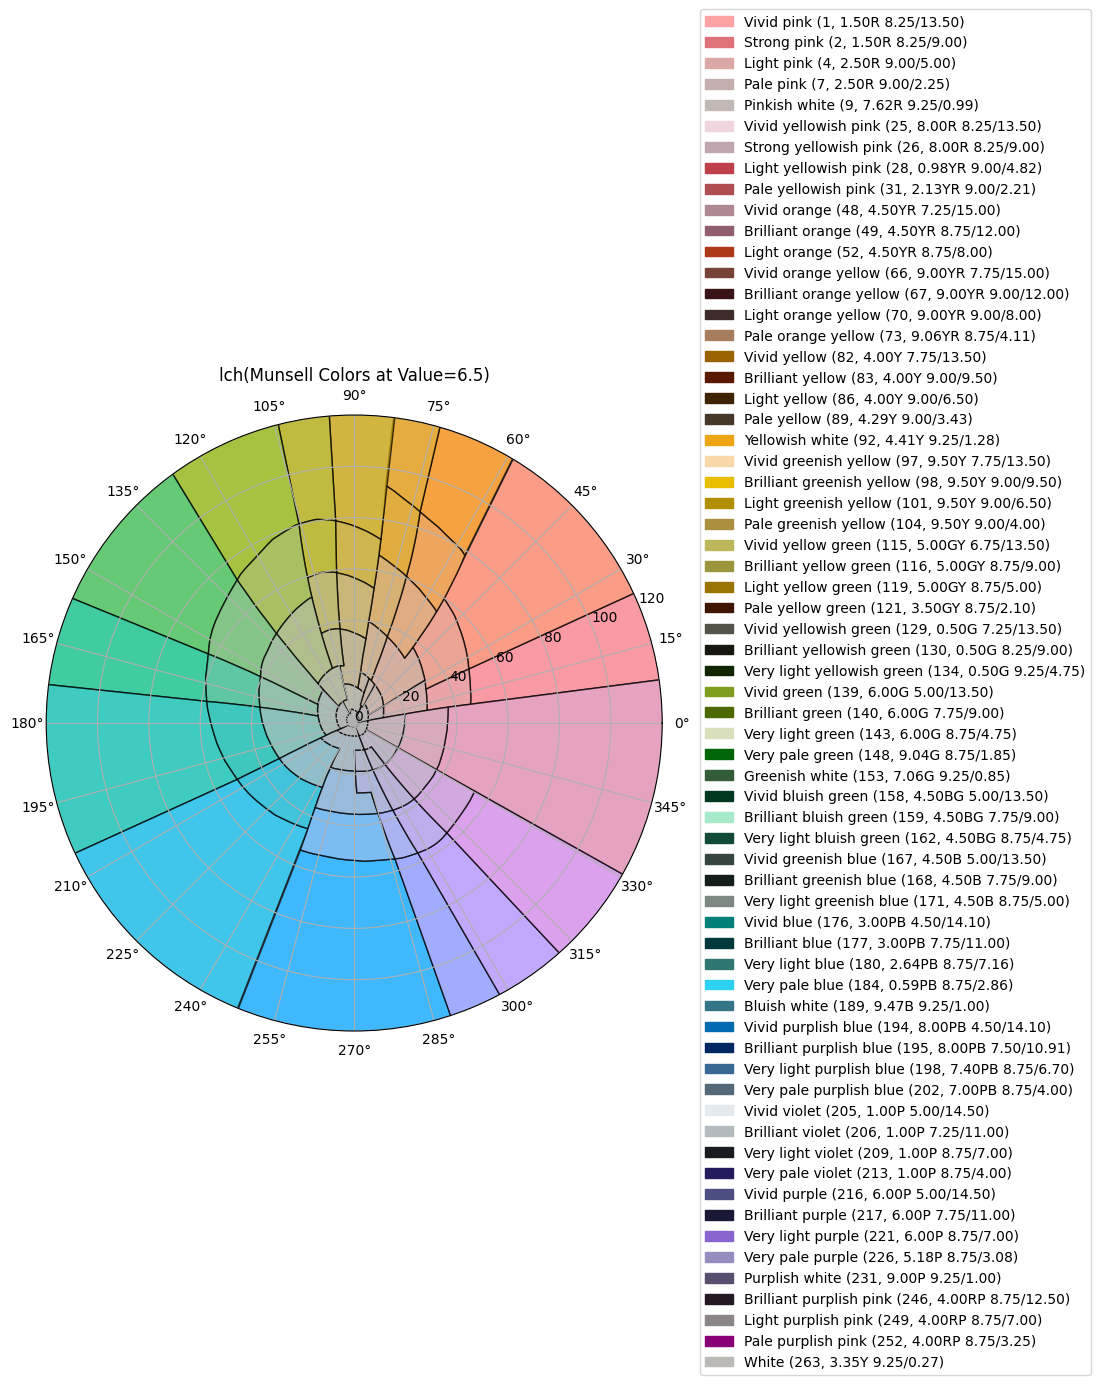

In [18]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon as PolygonShape
from shapely.ops import unary_union

from ISCC_NBS_renotations import lch_to_rgb
from ISCC_NBS_renotations import lch_to_polar
from ISCC_NBS_renotations import munsell_to_lch
from ISCC_NBS_renotations import point_to_hue_and_code

# can we put some blocks behind it?

def block_point_to_vert(hp, v, c):
    hue, hue_code = point_to_hue_and_code(hp)
    is_outside_edge = True if c >= 20.0 else False
    if is_outside_edge:
        c = 20.0
    m = munsell_specification_to_munsell_colour([hue, v, c, hue_code])
    lch = munsell_to_lch(m)
    # we want to project this out to "infinity" for purposes of the graph
    if is_outside_edge:
        lch[1] = 2000.0
    return lch_to_polar(lch)

def color_point(hp, v, c):
    hue, hue_code = point_to_hue_and_code(hp)
    is_outside_edge = True if c >= 20.0 else False
    if is_outside_edge:
        c = 20.0
    m = munsell_specification_to_munsell_colour([hue, v, c, hue_code])
    return munsell_to_rgbstr(m)    

VALUE = 6.5

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_title("lch(Munsell Colors at Value={})".format(VALUE))
ax.set_ylim(0, 120)
angle = np.deg2rad(0)
ax.legend(handles=color_patches, loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))

def get_polygon_vertices(m):
    hue_end = m.hue_end
    if hue_end < m.hue_begin:
        hue_end += 100.0
    chroma_end = m.chroma_end
    if chroma_end > 1000.0:
        chroma_end = 1000.0

    top    = [(m.hue_begin, x)    for x in np.linspace(m.chroma_begin, chroma_end, 10)]
    left   = [(x, m.chroma_begin) for x in np.linspace(hue_end, m.hue_begin, 10)]
    bottom = [(hue_end, x)        for x in np.linspace(chroma_end, m.chroma_begin, 10)]
    right  = [(x, chroma_end)     for x in np.linspace(m.hue_begin, hue_end, 10)]

    out = top + right + bottom + left
    return out

def add_background_polygons(plt, blocks, xfrm_func, color_func):
    combined_ranges = {}
    for m in blocks:
        new_p = PolygonShape(get_polygon_vertices(m))
        if m.id in combined_ranges:
            union_p = unary_union([combined_ranges[m.id], new_p])
            if union_p.geom_type == 'MultiPolygon':
                # oops! this one's probably over the 100.0->0.0 crossing
                x1 = combined_ranges[m.id].exterior.coords[0][0]
                if x1 < 50.0:
                    new_p = PolygonShape([(c[0] - 100.0, c[1]) for c in new_p.exterior.coords])
                else:
                    new_p = PolygonShape([(c[0] + 100.0, c[1]) for c in new_p.exterior.coords])
                union_p = unary_union([combined_ranges[m.id], new_p])
            combined_ranges[m.id] = union_p
        else:
            combined_ranges[m.id] = new_p

    for id in combined_ranges.keys():
        verts = [xfrm_func(c[0], c[1]) for c in combined_ranges[id].exterior.coords]
        hue = combined_ranges[id].centroid.x
        chroma = combined_ranges[id].centroid.y
        # if this is one of the "out-to-infinity" points, bring it way back in for purposes
        # of doing the color conversion
        if chroma > 400.0:
            chroma = np.min([xy[1] for xy in combined_ranges[id].exterior.coords]) * 1.1
        x, y = zip(*verts)
        plt.fill(
            x, y,
            color=color_func(hue, chroma),
            ec='#000000',
            alpha=0.75
        )

add_background_polygons(
    plt,
    filter(lambda m: m.value_begin <= VALUE and VALUE < m.value_end, colordb.get_color_ranges()),
    lambda h, c: block_point_to_vert(h, VALUE, c),
    lambda h, c: color_point(h, VALUE, c)
)

plt.show()


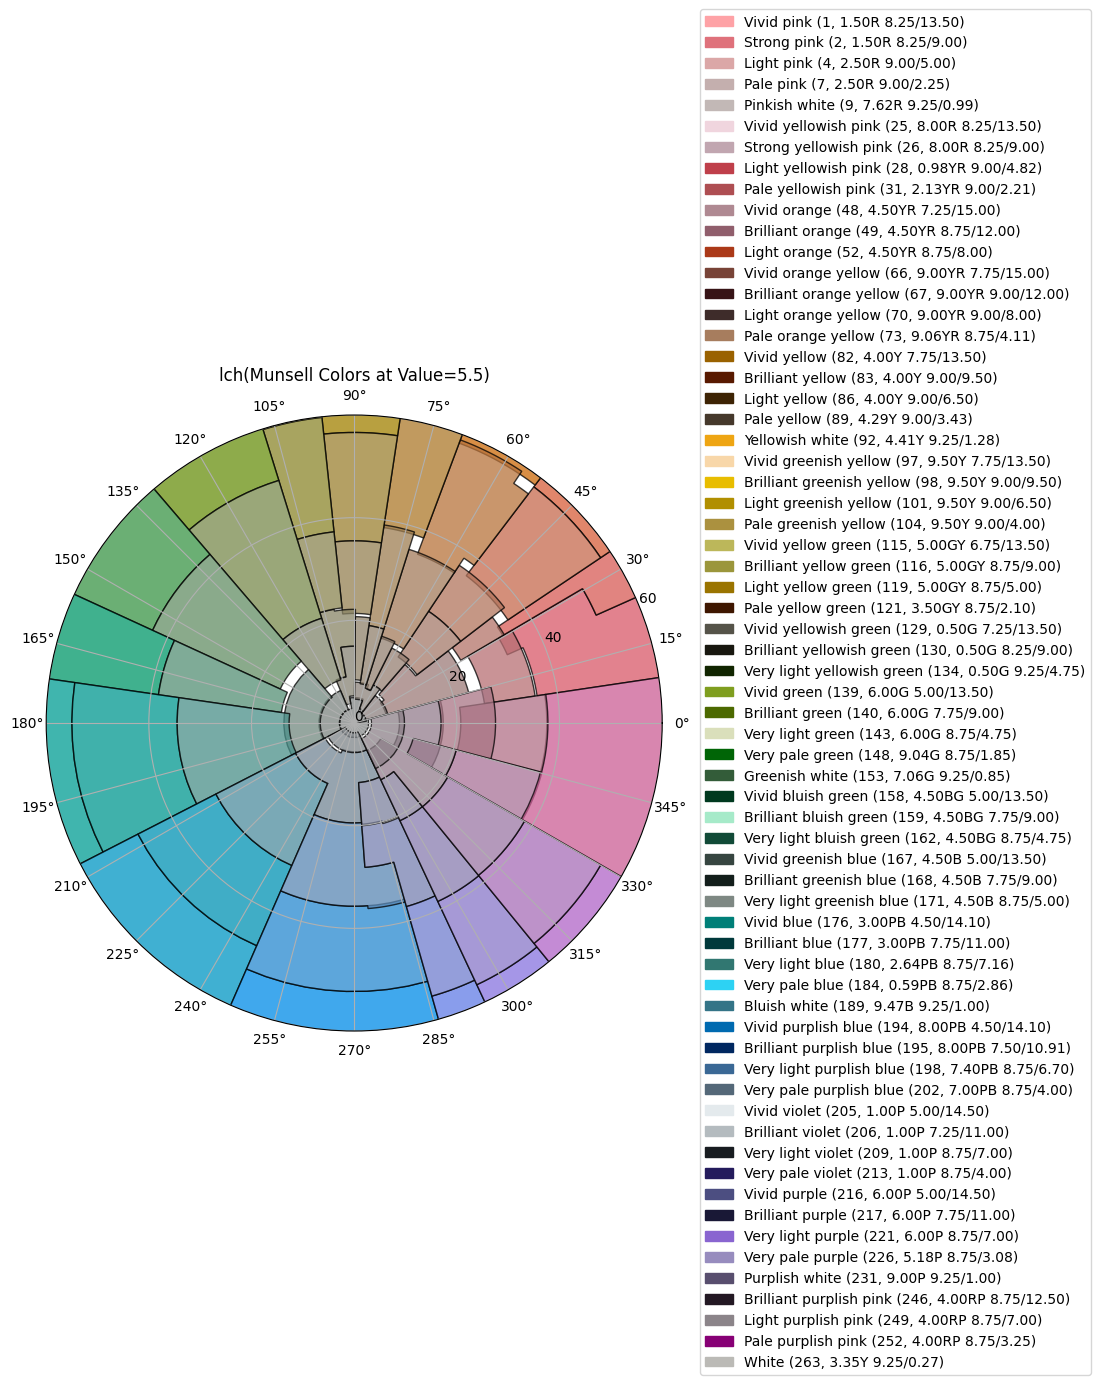

In [19]:
# Let's do two things

from ISCC_NBS_renotations import hue_point_average, merge_blocks_at_value, point_to_hue_and_code
from ISCC_NBS_renotations import ColorMatch, munsell_to_lch

from munsell import munsell_specification_to_munsell_colour

VALUE = 5.5

def lch_for_hue_point(hue_point, value, chroma):
    hue, hue_code = point_to_hue_and_code(hue_point)
    munsell_string = munsell_specification_to_munsell_colour([hue, value, chroma, hue_code])
    lch = munsell_to_lch(munsell_string)
    return lch

def get_average_lab_hue_for_munsell_hue_point(hp, value):
    huex = 0.0
    huey = 0.0
    samples = 0
    for c in np.arange(1.0, 16.0, 0.5):
        lch = lch_for_hue_point(hp, value, c)
        huex += math.cos(np.deg2rad(lch[2]))
        huey += math.sin(np.deg2rad(lch[2]))
        samples += 1
    hue_angle_degrees = np.rad2deg(math.atan2((huey / samples), (huex / samples)))
    return (hue_angle_degrees + 360) % 360

def get_hue_remap_table_for_value(value):
    hue_points = set()

    # figure out what hues we need to tweak
    for m in filter(lambda m: m.value_begin <= VALUE and VALUE < m.value_end, colordb.get_color_ranges()):
        hue_points.add(m.hue_begin)
        hue_points.add(m.hue_end)

    remap_table = {}
    for hp in hue_points:
        remap_table[hp] = get_average_lab_hue_for_munsell_hue_point(hp, value)
    return remap_table

def munsell_block_to_lch_block(remap_table, b, value):
    average_hp = hue_point_average(b.hue_begin, b.hue_end)

    chroma_begin = b.chroma_begin
    chroma_end = b.chroma_end
    
    is_outside_edge = True if chroma_end >= 20.0 else False
    if is_outside_edge:
        chroma_end = 20.0
    
    lch_begin = lch_for_hue_point(average_hp, value, chroma_begin)
    lch_end = lch_for_hue_point(average_hp, value, chroma_end)

    if is_outside_edge:
        lch_end[1] = 2000.0

    # add_background_polygons all assumes this is on a 100pt scale
    hue_begin = remap_table[b.hue_begin] * 100.0 / 360.0
    hue_end = remap_table[b.hue_end] * 100.0 / 360.0

    return ColorMatch(b.id,
                      hue_begin=hue_begin, hue_end=hue_end,
                      value_begin=lch_begin[0], value_end=lch_end[0],
                      chroma_begin=lch_begin[1], chroma_end=lch_end[1])

def bg_xfrm_func(h, c):
    return (h * math.pi / 50.0, c)

def bg_color_func(h, c):
    lch = (VALUE * 10, c, h * 360.0 / 100.0)
    Lab = colour.LCHab_to_Lab(lch)
    XYZ = colour.Lab_to_XYZ(Lab)
    sRGB = colour.XYZ_to_sRGB(XYZ)
    return colour.notation.RGB_to_HEX(sRGB) 

blocks_for_value = merge_blocks_at_value(colordb.get_color_ranges(), VALUE)
remap_table = get_hue_remap_table_for_value(VALUE)
new_blocks = [munsell_block_to_lch_block(remap_table, b, VALUE) for b in blocks_for_value]

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot(projection='polar')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_title("lch(Munsell Colors at Value={})".format(VALUE))
ax.set_ylim(0, 60)
angle = np.deg2rad(0)
ax.legend(handles=color_patches, loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))

add_background_polygons(plt, new_blocks, bg_xfrm_func, bg_color_func)

plt.show()


In [ ]:
# First, we want to take the hue boundaries

from ISCC_NBS_renotations import point_to_hue_and_code, munsell_hue_point_name

def lch_for_hue_point(hue_point, value, chroma):
    hue, hue_code = point_to_hue_and_code(hue_point)
    munsell_string = munsell_specification_to_munsell_colour([hue, value, chroma, hue_code])
    lch = munsell_to_lch(munsell_string)
    return lch

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot()
ax.set_title("LCH Hues based on value for Selected Munsell Hues"))

for hp in colordb.get_hue_points():
    data = []
    for v in np.arange(1.0, 9.0, 0.5):        
        huex = 0.0
        huey = 0.0
        samples = 0
        
        for c in np.arange(1.0, 16.0, 0.5):
            lch = lch_for_hue_point(hp, v, c)
            huex += math.cos(np.deg2rad(lch[2]))
            huey += math.sin(np.deg2rad(lch[2]))
            samples += 1

        hue_angle_degrees = np.rad2deg(math.atan2((huey / samples), (huex / samples)))
        data.append(hue_angle_degrees)

    x = np.arange(1.0, 9.0, 2.0)
    y = data
    ax.plot(x, y, label='{}'.format(munsell_hue_point_name(hp)))
    #print("hi")

ax.legend(loc="lower left", bbox_to_anchor=(1, 0))
plt.show()

value=1.0, chroma=1.0: offset = 4.07151436412123, factor = 3.379420539458865
value=1.0, chroma=2.0: offset = 8.193679871088408, factor = 6.616481720107771
value=1.0, chroma=3.0: offset = 12.283303365873342, factor = 9.952890345673788
value=1.0, chroma=4.0: offset = 16.450323267326645, factor = 13.530465079113021
value=1.0, chroma=5.0: offset = 20.442261899879206, factor = 16.499140885089417
value=1.0, chroma=6.0: offset = 24.54636530179022, factor = 20.095190801082826
value=1.0, chroma=7.0: offset = 28.59296804635718, factor = 22.661085449953433
value=1.0, chroma=8.0: offset = 32.80493505604727, factor = 26.4412397567652
value=1.0, chroma=9.0: offset = 36.60715068352451, factor = 30.345032734517858
value=1.0, chroma=10.0: offset = 40.57828921192155, factor = 34.991632528250385
value=1.0, chroma=11.0: offset = 44.42098165643663, factor = 37.27212273787938
value=1.0, chroma=12.0: offset = 48.45108220958117, factor = 39.28740595769085
value=1.0, chroma=13.0: offset = 52.36906365492693, fa

KeyboardInterrupt: 

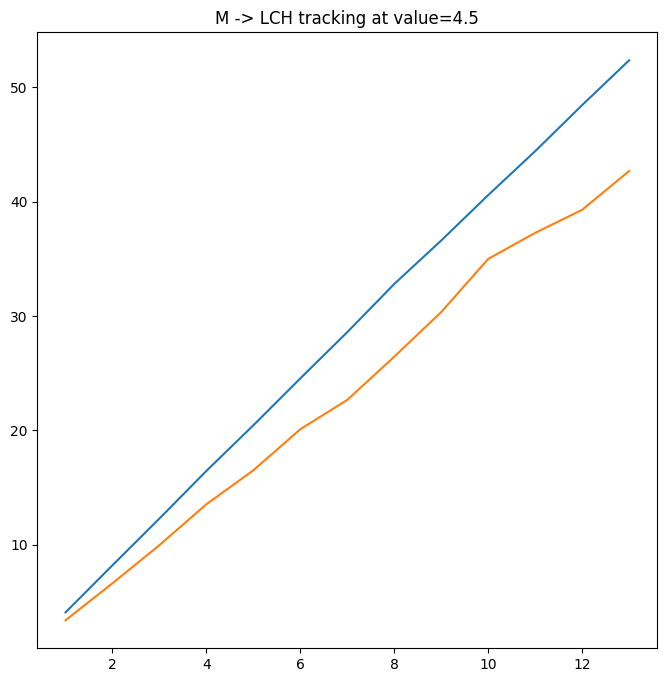

In [20]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
import scipy

from ISCC_NBS_renotations import lch_to_rgb
from ISCC_NBS_renotations import lch_to_polar
from ISCC_NBS_renotations import munsell_to_lch
from ISCC_NBS_renotations import point_to_hue_and_code

VALUE = 4.5

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot()
#ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
#ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_title("M -> LCH tracking at value={}".format(VALUE))
#ax.set_ylim(-100, 100)

def lch_for_hue_point(hue_point, value, chroma):
    hue, hue_code = point_to_hue_and_code(hue_point)
    munsell_string = munsell_specification_to_munsell_colour([hue, VALUE, chroma, hue_code])
    lch = munsell_to_lch(munsell_string)
    return lch

for value in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]:
    plot1 = []
    plot2 = []

    for chroma in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]: #np.arange(1.0, 18.0, 1.0):
        xy = [lch_to_polar(lch_for_hue_point(hp, value, chroma)) for hp in np.linspace(0.0, 100.0, 100)]
        theta, r = zip(*xy)
        scale_offset = np.min(r)
        scale_factor = np.max(r) - np.min(r)
        #r = scale_to_0_1(r)
        #theta = np.linspace(0.0, 100.0, 100)
        print("value={}, chroma={}: offset = {}, factor = {}".format(value, chroma, scale_offset, scale_factor))
        plot1.append((chroma, scale_offset))
        plot2.append((chroma, scale_factor))

    chromas, offsets = zip(*plot1)
    reg = scipy.stats.linregress(chromas, offsets)
    ax.plot(chromas, offsets, label='offsets (v={}, slope={}, intercept={})'.format(value, reg.slope, reg.intercept))
    chromas, factors = zip(*plot2)
    reg = scipy.stats.linregress(chromas, factors)
    ax.plot(chromas, factors, label='factors (v={}, slope={}, intercept={})'.format(value, reg.slope, reg.intercept))
    

angle = np.deg2rad(0)
ax.legend(loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))

plt.show()


new best coeff = (-16.0, -2.0, -1.0, -2.0, -0.5, -1.0), error = 16.313642168822366
the good ones: coeff = (-16.0, -2.0, -1.0, -2.0, -0.5, -1.0), error = 16.313642168822366


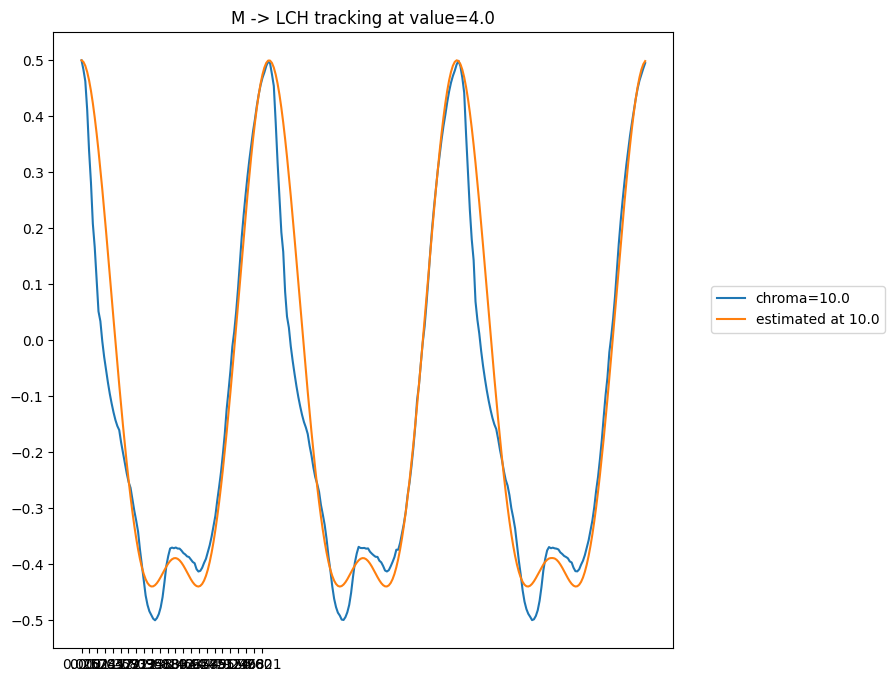

In [21]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import itertools
import numpy as np
import scipy

from ISCC_NBS_renotations import lch_to_rgb
from ISCC_NBS_renotations import lch_to_polar
from ISCC_NBS_renotations import munsell_to_lch
from ISCC_NBS_renotations import point_to_hue_and_code

VALUE = 4.0

fig = plt.figure(figsize=[8.0, 8.0])
ax = fig.add_subplot() #projection='polar')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/ (360.0 / 30.0) ))
#ax.set_xticks(xtick_minor_ticks, labels=xtick_minor_labels, minor=True)
#ax.set_yticks(np.arange(0, 140.0, 20.0))
ax.set_yticks(np.linspace(-0.5, 0.5, 11))
ax.set_title("M -> LCH tracking at value={}".format(VALUE))
#ax.set_ylim(-100, 100)

def lch_for_hue_point(hue_point, value, chroma):
    hue, hue_code = point_to_hue_and_code(hue_point)
    munsell_string = munsell_specification_to_munsell_colour([hue, VALUE, chroma, hue_code])
    lch = munsell_to_lch(munsell_string)
    return lch

dctavg = None
dctavg_n = 0

def scale_to_0_1(ar):
    return (ar - np.min(ar))/(np.max(ar) - np.min(ar))

def put_max_first(r):
    peak_index = np.argmax(r)
    r = np.concatenate((r[peak_index:len(r)], r[0:peak_index]))
    return r

for chroma in [10.0]: #np.arange(1.0, 18.0, 1.0):
    xy = [lch_to_polar(lch_for_hue_point(hp, VALUE, chroma)) for hp in np.linspace(0.0, 300.0, 300)]
    theta, r = zip(*xy)
    theta = np.linspace(0.0, 6*math.pi, 300)

    scale_offset = np.min(r)
    scale_factor = np.max(r) - np.min(r)
    r = scale_to_0_1(r) - 0.5
    
    #ax.plot(theta, r, label='chroma={}'.format(chroma))

ideal_r = r
peak_index = np.argmax(ideal_r)
ideal_r = np.concatenate((ideal_r[peak_index:len(ideal_r)], ideal_r[0:peak_index]))
#ax.plot(theta, ideal_r, label='chroma={}'.format(chroma))

    
def test_plot(hp, value, chroma):
    theta = ((hp) * (np.pi / 50.0)) % (2 * np.pi)
    #r = (math.sin(theta + (math.pi * 1.25))) * (1 - (theta / (2 * math.pi)))
    #r = math.cos((theta + -math.sin(theta * 2)) * 2)
    x = theta + math.pi * 1.0
    r = (-32.0*math.cos(x*-2 + math.sin(x)*0.0) + -0.125*math.cos(x*-0.0625 - math.sin(x)*0.0)) / ((-32 + -0.125)*2)
    #r = np.sinc((theta * 0.5) - math.pi * 0.6) - 0.5
    #r = (r * 0.5) + 0.5
    return (theta, r)

# (-32.0, -0.125, -2.0, -0.0625, 0.0, 0.0, 1.0) ?
def test_plot2(hp, value, chroma, coeff):
    theta = ((hp) * (np.pi / 50.0)) % (2 * np.pi)
    #r = (math.sin(theta + (math.pi * 1.25))) * (1 - (theta / (2 * math.pi)))
    #r = math.cos((theta + -math.sin(theta * 2)) * 2)
    x = theta + math.pi
    if (coeff[0]+coeff[1]) == 0:
        r = 200
    else:
        r = (coeff[0]*math.cos(x*coeff[2] + math.sin(x)*coeff[4]) + coeff[1]*math.cos(x*coeff[3] - math.sin(x)*coeff[5])) / ((coeff[0]+coeff[1])*2)
    #r = np.sinc((theta * 0.5) - math.pi * 0.6) - 0.5
    #r = (r * 0.5) + 0.5
    return (theta, r)


def value_6_5_match(hp, value, chroma):
    theta = ((hp) * (np.pi / 50.0)) % (2 * np.pi)
    x = theta + -0.6*math.pi
    r = (-16.0*math.cos(-x + -math.sin(x)/2) + -2.0*math.cos(x/16 - math.sin(x)*4)) / ((-16.0+-2.0)*2)
    return (theta, r)

#xy = [test_plot(hp, VALUE, 10.0) for hp in np.linspace(0.0, 200.0, 200)]
#theta, r = zip(*xy)
#theta = np.linspace(0.0, 4*math.pi, 200)

powers_of_two = [1, 2, 4, 8, 16]
coeff_choices = np.concatenate(([x for x in powers_of_two], [1/x for x in powers_of_two]))
coeff_choices = np.concatenate((coeff_choices, -coeff_choices, [0]))
coeff_choices.sort()
min_error = None
min_error_coeffs = None

# for coeff in [(-8.0, -0.125, -0.125, -0.125, 4.0, 2.0)]:
# for coeff in [(-16.0, -2.0, -1.0, -0.0625, -0.5, 4.0)]:
#for coeff in itertools.product(coeff_choices, coeff_choices, coeff_choices, coeff_choices, coeff_choices, coeff_choices):
for coeff in [(-16.0, -2.0, -1.0, -2.0, -0.5, -1.0),
              #(-16.0, -2.0, -1.0, -0.25, -0.5, -8.0),
              #(-16.0, -0.5, -1.0, -0.25, -0.5, -8.0)
             ]:
    # drop anything with obvious discontinuities
    if np.abs(test_plot2(99.0, VALUE, 10.0, coeff)[1] - test_plot2(100.0, VALUE, 10.0, coeff)[1]) > 0.1:
        continue
    
    xy = [test_plot2(hp, VALUE, 10.0, coeff) for hp in np.linspace(0.0, 300.0, 300)]
    theta, r = zip(*xy)

    r = put_max_first(r)    
    diff = np.abs(r - ideal_r)
    rel_error = np.sum(diff)

    if min_error is None or min_error > rel_error:
        min_error = rel_error
        min_error_coeffs = coeff
        print("new best coeff = {}, error = {}".format(coeff, rel_error))

for chroma in [10.0]: #np.arange(1.0, 18.0, 1.0):
    xy = [lch_to_polar(lch_for_hue_point(hp, VALUE, chroma)) for hp in np.linspace(0.0, 300.0, 300)]
    theta, r = zip(*xy)
    theta = np.linspace(0.0, 6*math.pi, 300)

    scale_offset = np.min(r)
    scale_factor = np.max(r) - np.min(r)
    r = scale_to_0_1(r) - 0.5
    
    #ax.plot(theta, r, label='chroma={}'.format(chroma))

theta = np.linspace(0.0, 6*math.pi, 300)
ax.plot(theta, ideal_r, label='chroma={}'.format(chroma))

print("the good ones: coeff = {}, error = {}".format(min_error_coeffs, min_error))
xy = [test_plot2(hp, VALUE, 10.0, coeff) for hp in np.linspace(0.0, 300.0, 300)]
theta, r = zip(*xy)
r = put_max_first(r)
theta = np.linspace(0.0, 6*math.pi, 300)
ax.plot(theta, r, label='estimated at {}'.format(chroma))

    

angle = np.deg2rad(0)
ax.legend(loc="center left", bbox_to_anchor=(.55 + np.cos(angle)/2, .55 + np.sin(angle)/2))

plt.show()